<a href="https://colab.research.google.com/github/rudrakshi99/Breast-Cancer-Classification/blob/master/Comparative_Analysis_of_Breast_Cancer_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparative Analysis of Breast Cancer Algorithms

---



1.**Problem Statement**

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

**1.1 Expected outcome**

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

**1.2 Objective**

Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

**1.3 Identify data sources**

The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

#DATA CLEANING

In [ ]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

# Read the file "data.csv" and print the contents.
#!cat data/data.csv
data = pd.read_csv('/content/data.csv', index_col=False,)

In [ ]:
#Load Dataset
#First, load the supplied CSV file using additional options in the Pandas read_csv function.

data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
# Save the cleaner version of dataframe with "id" for future analyis
data.to_csv('/content/data_clean_id.csv')

In [ ]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
data.shape
#In the result displayed, you can see the data has 569 records, each with 32 columns.

#he “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

(569, 31)

In [ ]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Review number of columns of each data type in a DataFrame:
data.apply(type).value_counts()

<class 'pandas.core.series.Series'>    31
dtype: int64

In [ ]:
data.diagnosis.unique()

# From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values 
#  (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we 
#   need some method of coding to convert them.

array(['M', 'B'], dtype=object)

In [ ]:
#save the cleaner version of dataframe for future analyis
data.to_csv('/content/clean-data.csv')

#DATA VISUALIZATION



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('/content/data_clean_id.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])


,# of observations
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis', ylabel='count'>

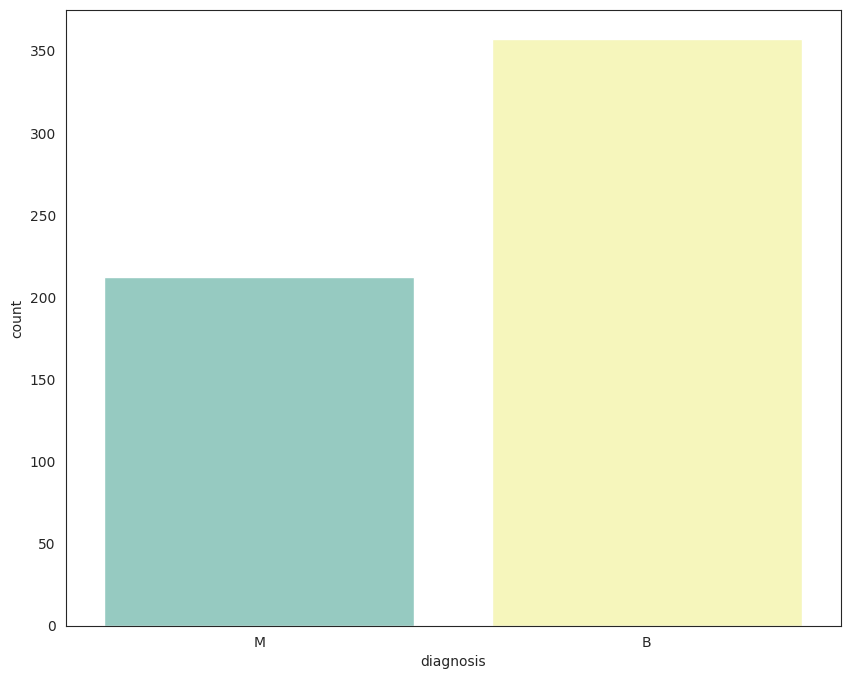

In [ ]:

#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x=data['diagnosis'],label='Count',palette="Set3")

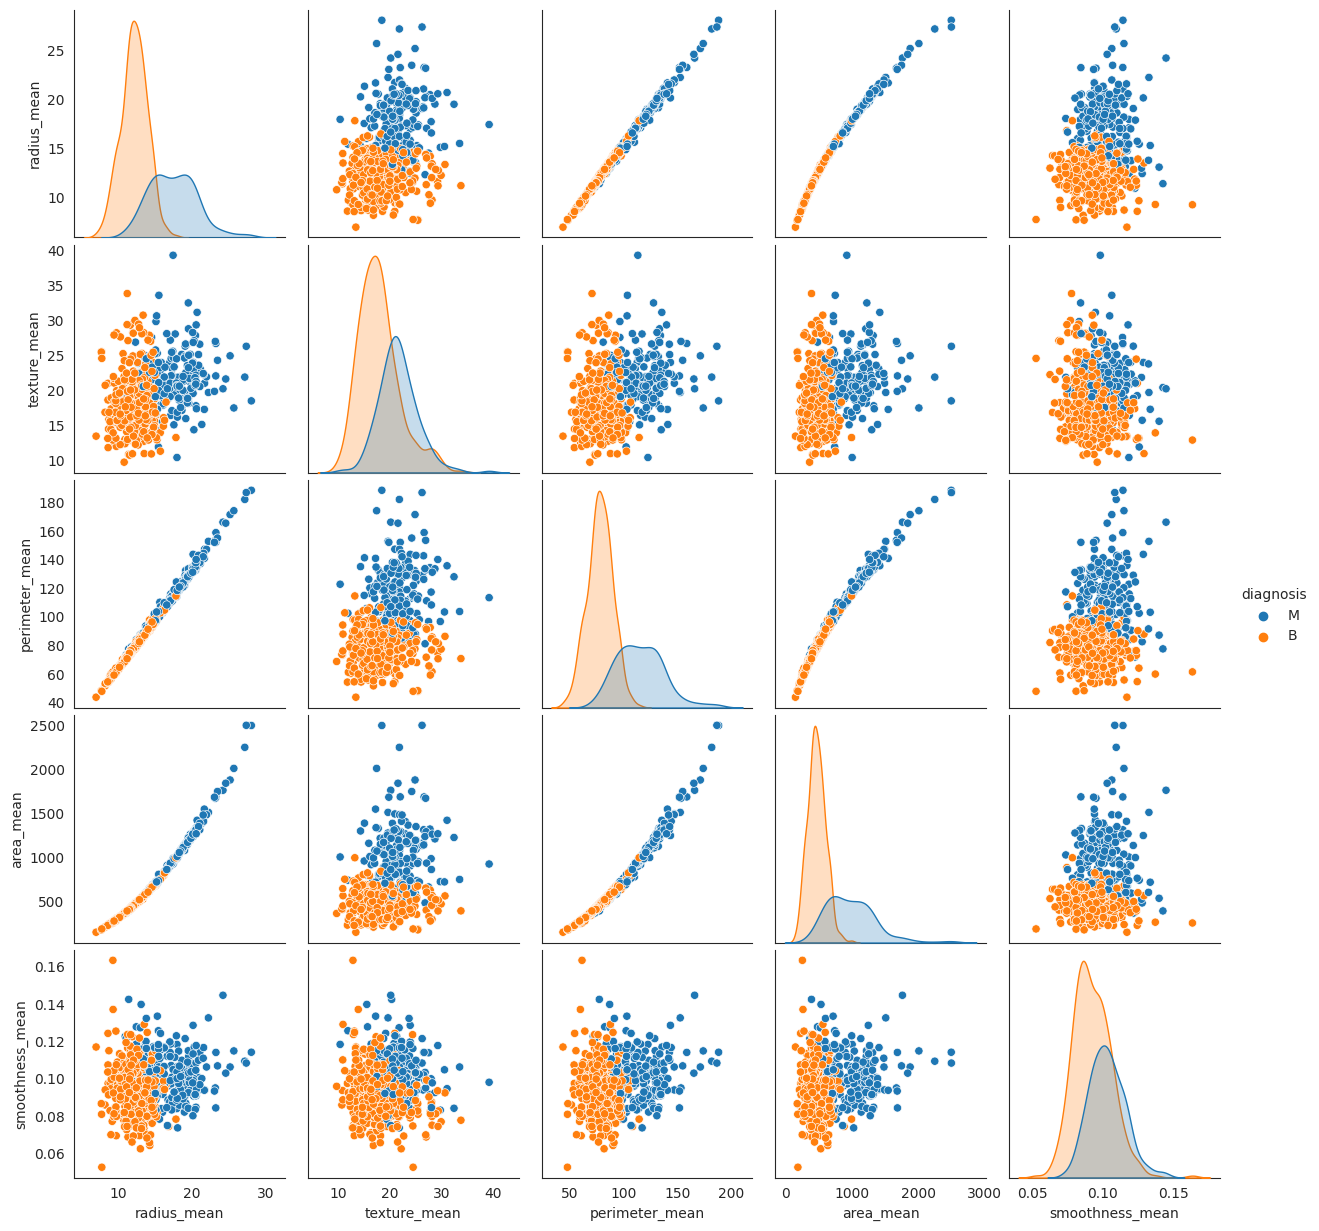

In [ ]:
# sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#        'smoothness_mean']) #first five variables
sns.pairplot(data, hue = 'diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'])

#blue points are malignent case which are severe cases or life threatning cases.
#orange points are not very severe or life threatning

##Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

In [ ]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:22]
data_worst=data.iloc[:,23:]

print(data_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')


###Histogram the "_mean" suffix designition


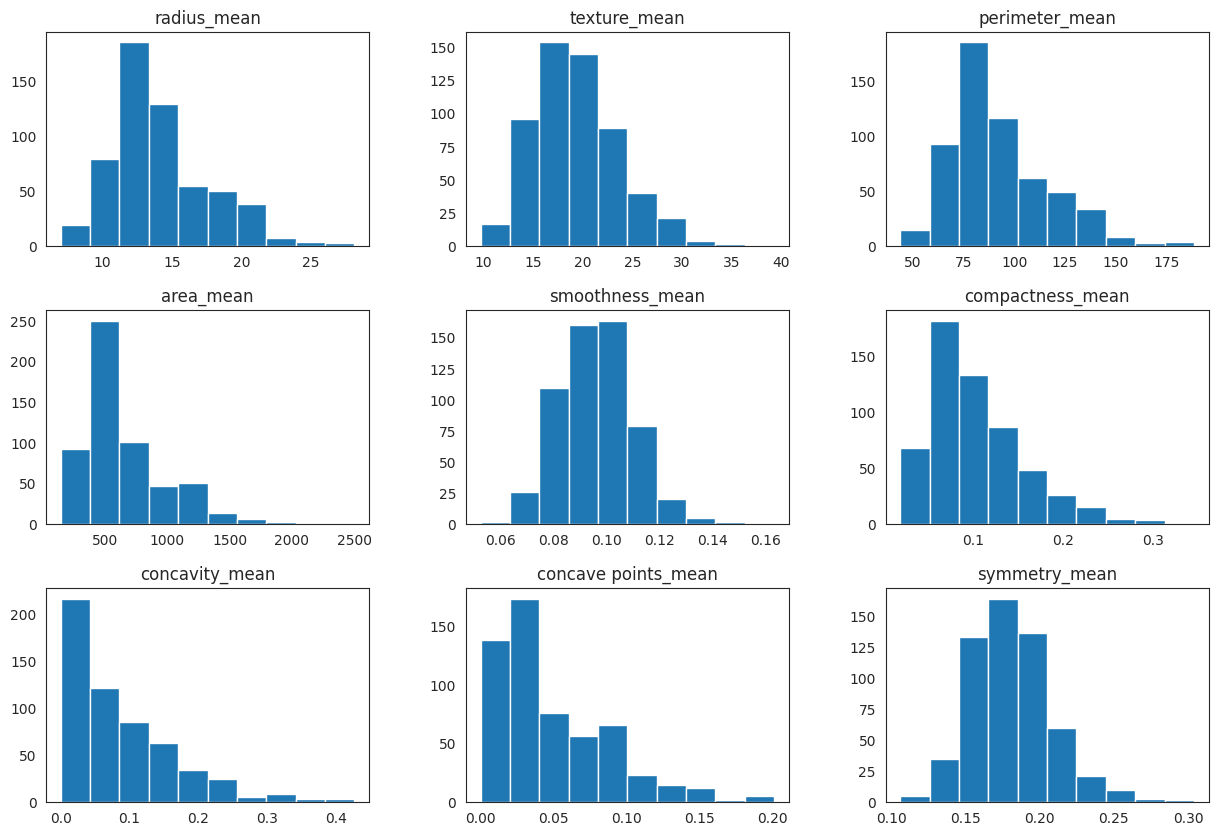

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

###Histogram for the "_se" suffix designition


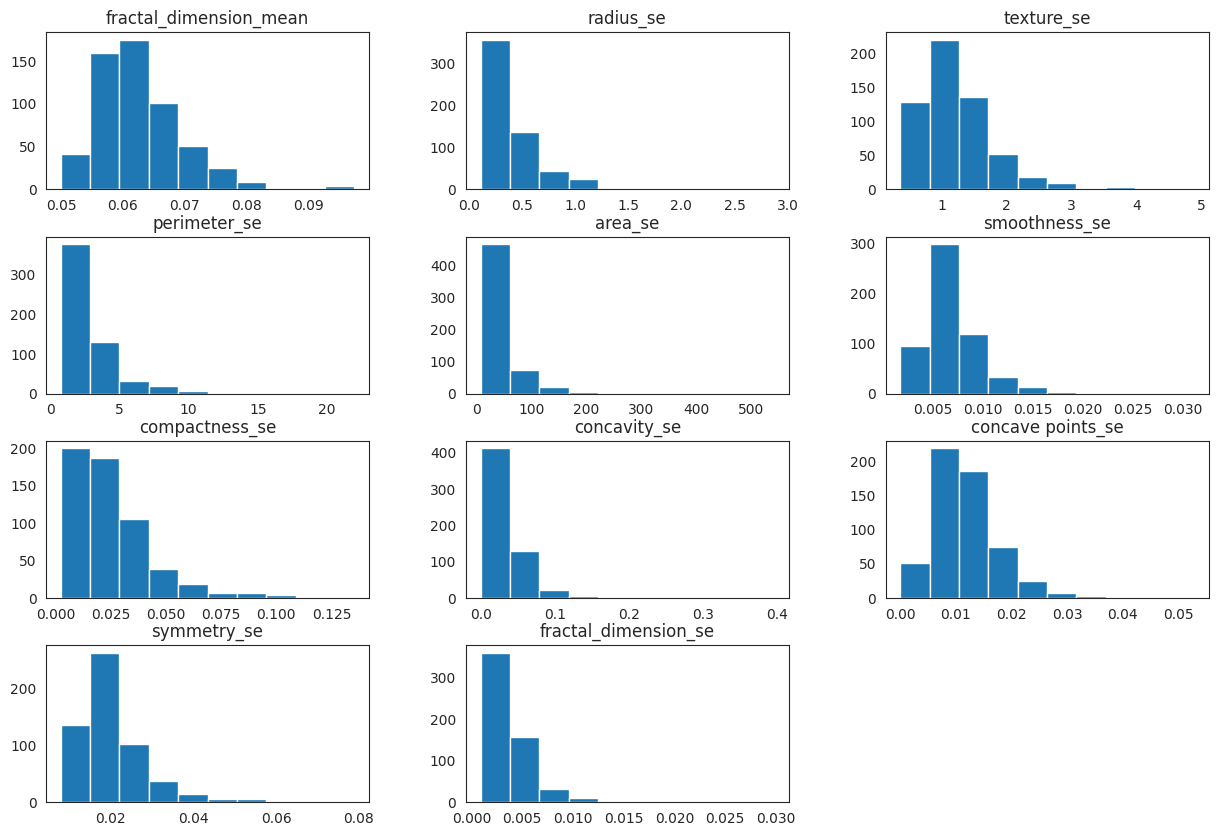

In [ ]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

###Histogram "_worst" suffix designition


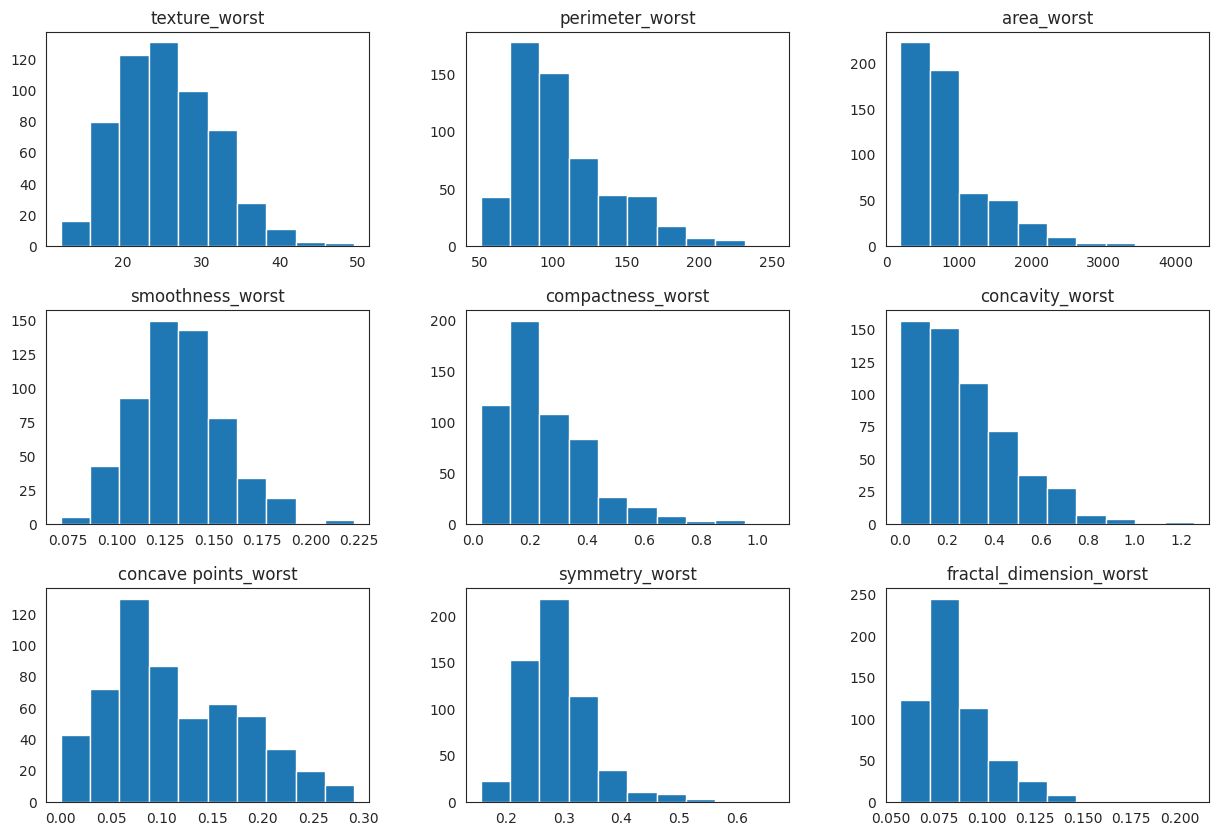

In [ ]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

##Visualize distribution of data via density plots

###Density plots "_mean" suffix designition






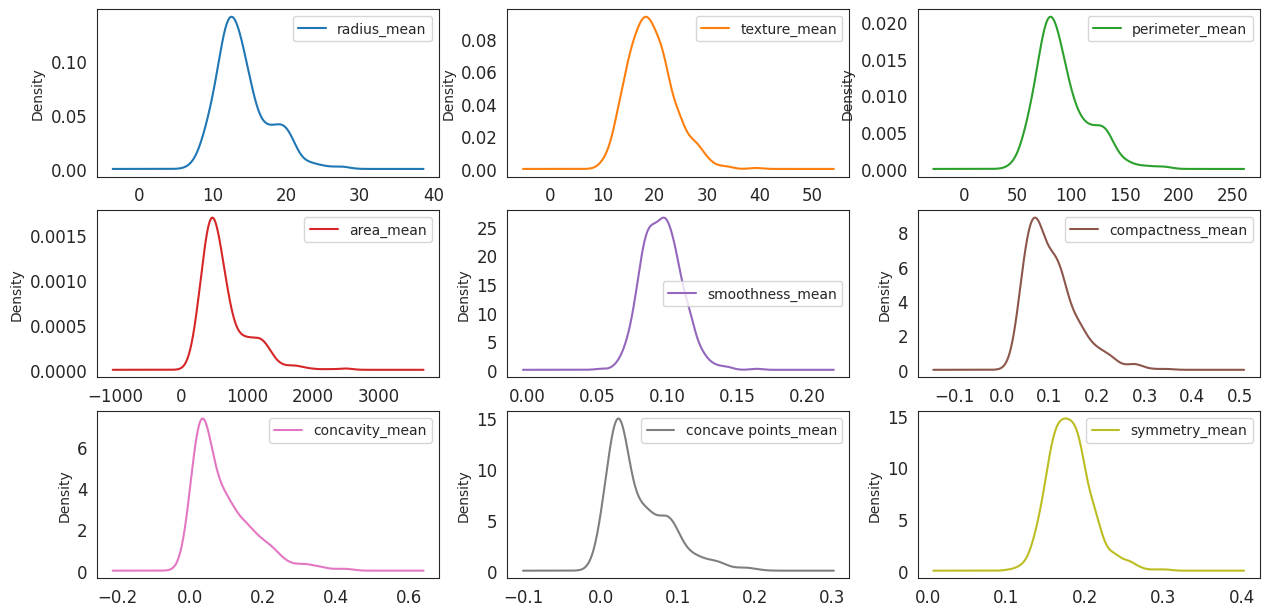

In [ ]:
#Density Plots
plots = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

###Density plots "_se" suffix designition


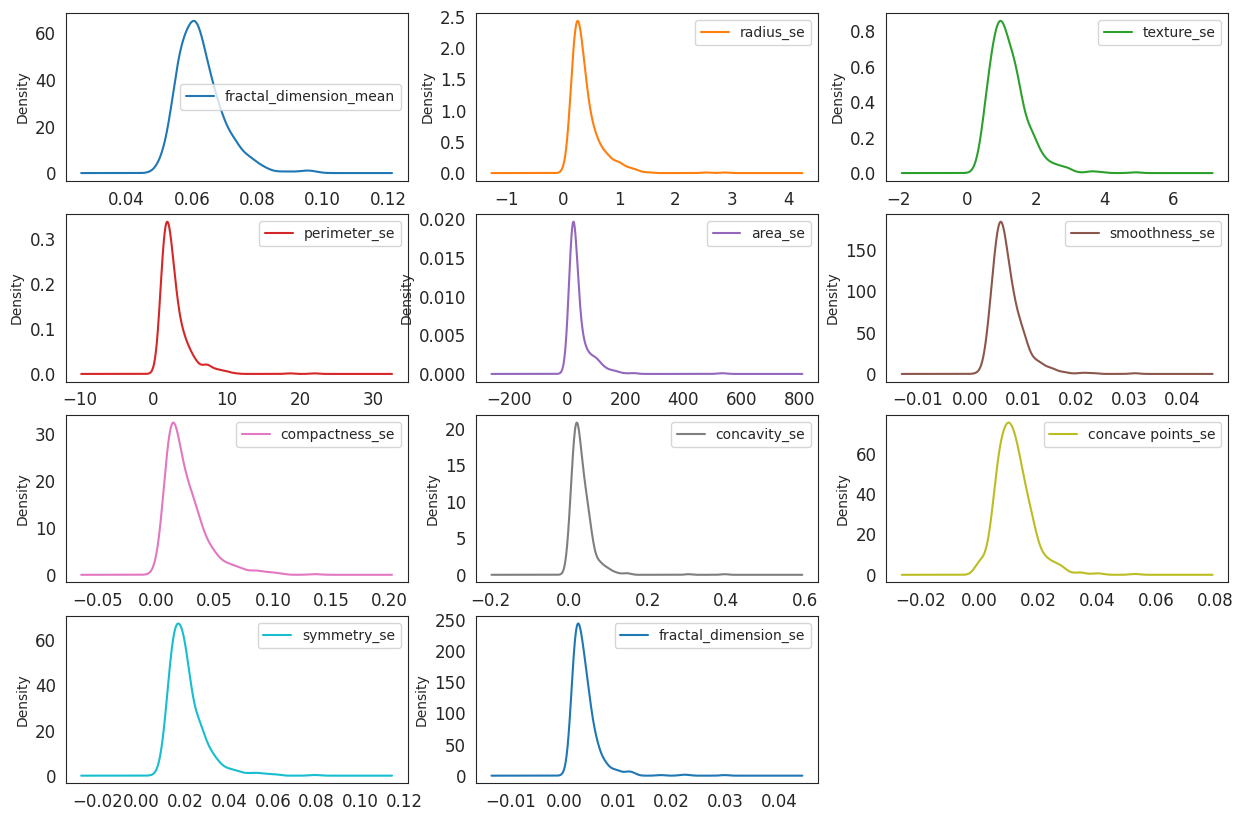

In [ ]:
#Density Plots
plots = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False,fontsize=12, figsize=(15,10))

###Density plot "_worst" suffix designition


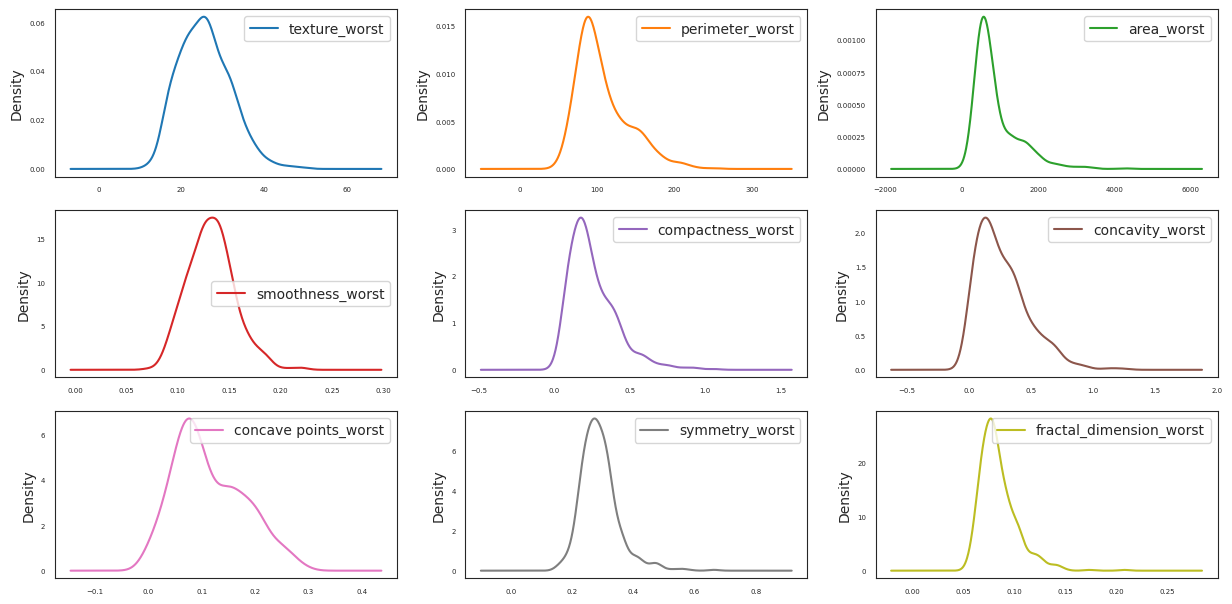

In [ ]:
#Density Plots
plots = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                    figsize=(15,10))

<ipython-input-51-72d7a6263661>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =True)


<Axes: >

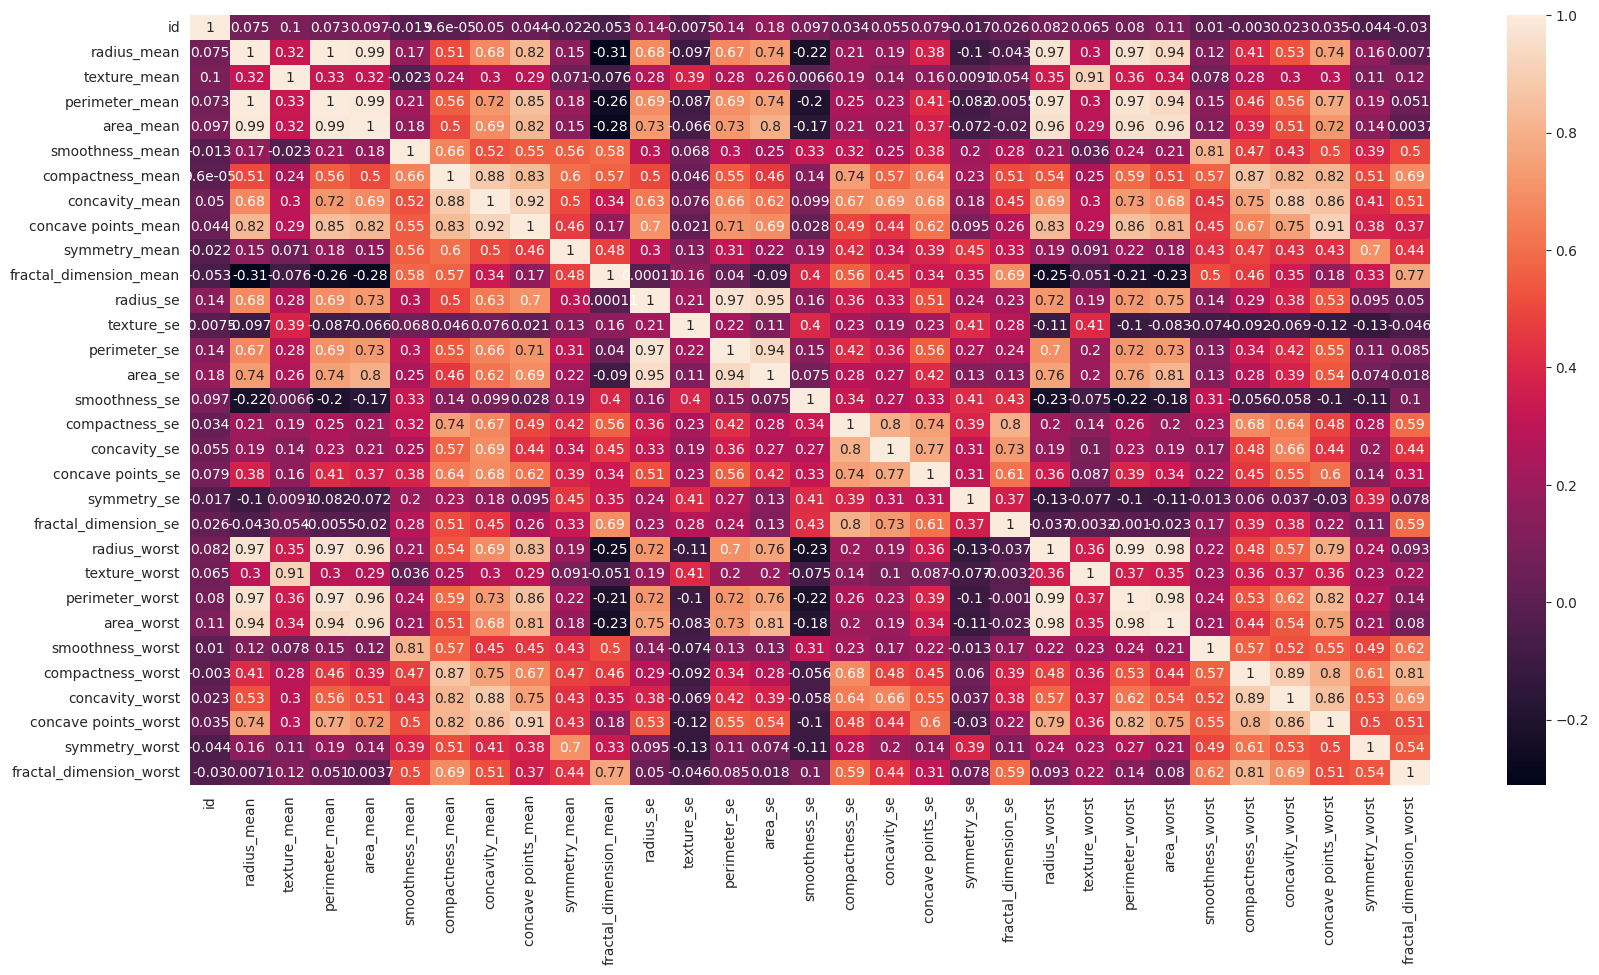

In [ ]:
#here we made a heatmap figure of correlation of all the columns
plt.figure(figsize =(20,10))
sns.heatmap(data.corr(), annot =True)


**Summary**

Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

In any of the histograms there are no noticeable large outliers that warrants further cleanup.

#MODEL TRANING

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/clean-data.csv')

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM
svm_model = SVC(kernel='linear', C=1)

# Hyperparameter Tuning for SVM
svm_params = {'C': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm_model, svm_params)
svm_grid.fit(X_train, y_train)
best_svm_model = svm_grid.best_estimator_

svm_model.fit(X_train, y_train)

#kNN
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

# Decision  Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


#Random Forest
rf_model = RandomForestClassifier(n_estimators=100)

# Hyperparameter Tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200]}
rf_grid = GridSearchCV(rf_model, rf_params)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

rf_model.fit(X_train, y_train)

# Make predictions using the base models
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Create the hybrid model - Voting Classifier
hybrid_model = VotingClassifier(estimators=[('svm', best_svm_model),('rf',best_rf_model)], voting='hard')

# Train the hybrid model
hybrid_model.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC(C=0.1, kernel='linear')),
                             ('rf', RandomForestClassifier())])

#RESULT ANALYSIS

> Precision = TP / (TP + FP)
>
> Recall = TP / (TP + FN)
>
> F1-score = 2 * (Precision * Recall) / (Precision + Recall)
>
>Support = TP + FN

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training set
svm_train_pred = svm_model.predict(X_train)
knn_train_pred = knn_model.predict(X_train)
dt_train_pred = dt_model.predict(X_train)
rf_train_pred = rf_model.predict(X_train)
hybrid_train_pred = hybrid_model.predict(X_train)


# Calculate training accuracies
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
hybrid_train_accuracy = accuracy_score(y_train, hybrid_train_pred)

# Make predictions on the testing set
svm_test_pred = svm_model.predict(X_test)
knn_test_pred = knn_model.predict(X_test)
dt_test_pred = dt_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)
hybrid_test_pred = hybrid_model.predict(X_test)

# Calculate testing accuracies
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
hybrid_test_accuracy = accuracy_score(y_test, hybrid_test_pred)

# Print the classification report and the training & testing accuracies
print("SVM Training Accuracy: {:.2f}%".format(svm_train_accuracy * 100))
print("SVM Testing Accuracy: {:.2f}%".format(svm_test_accuracy * 100))
print("SVM Classification Report:")
print(classification_report(y_test, svm_test_pred))

print("KNN Training Accuracy: {:.2f}%".format(knn_train_accuracy * 100))
print("KNN Testing Accuracy: {:.2f}%".format(knn_test_accuracy * 100))
print("KNN Classification Report:")
print(classification_report(y_test, knn_test_pred))


print("Decision Tree Training Accuracy: {:.2f}%".format(dt_train_accuracy * 100))
print("Decision Tree Testing Accuracy: {:.2f}%".format(dt_test_accuracy * 100))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_test_pred))

print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy * 100))
print("Random Forest Testing Accuracy: {:.2f}%".format(rf_test_accuracy * 100))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))


print("Hybrid Model Training Accuracy: {:.2f}%".format(hybrid_train_accuracy * 100))
print("Hybrid Model Testing Accuracy: {:.2f}%".format(hybrid_test_accuracy * 100))
print("Hybrid Model Classification Report:")
print(classification_report(y_test, hybrid_test_pred))


SVM Training Accuracy: 98.68%
SVM Testing Accuracy: 95.61%
SVM Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

KNN Training Accuracy: 98.02%
KNN Testing Accuracy: 94.74%
KNN Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree Training Accuracy: 100.00%
Decision Tree Testing Accuracy: 93.86%
Decision Tree Classification Report:
              precision    recall  f1-score   support

  

#CONFUSION MATRIX

In a binary classification problem, a confusion matrix is a table that summarizes the performance of a classification model by displaying the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

* **True positive (TP):** The model correctly predicted the positive class (1) when the actual class was also positive.
* **True negative (TN):** The model correctly predicted the negative class (0) when the actual class was also negative.
* **False positive (FP):** The model incorrectly predicted the positive class (1) when the actual class was negative (0).
* **False negative (FN):** The model incorrectly predicted the negative class (0) when the actual class was positive (1).

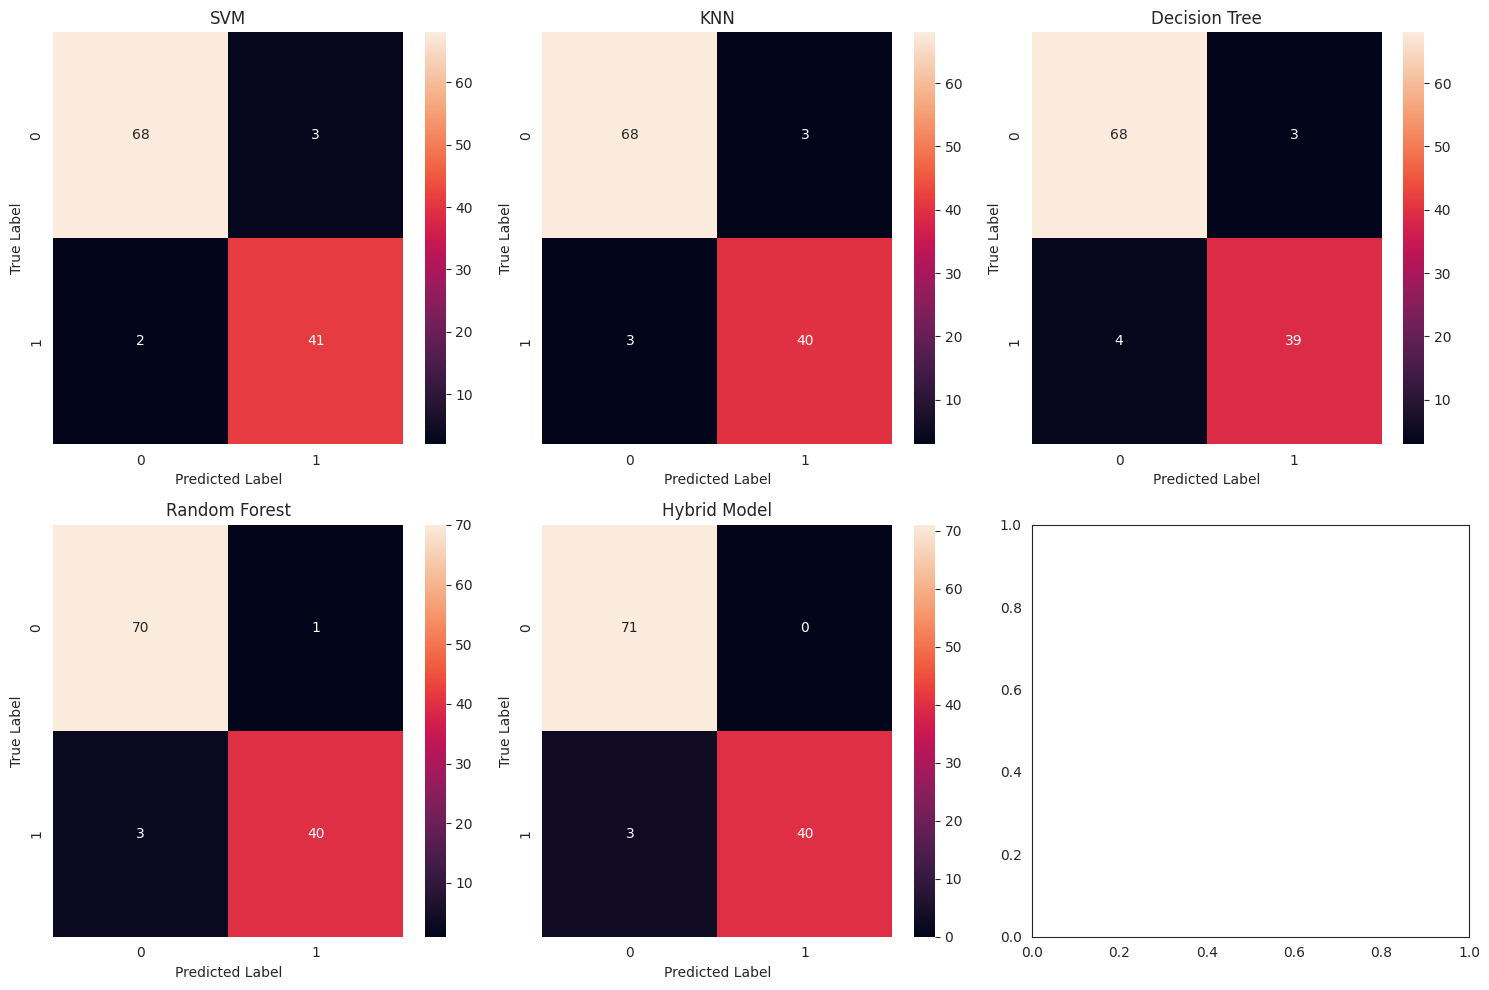

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, svm_test_pred)
cm_knn = confusion_matrix(y_test, knn_test_pred)
cm_decision_tree = confusion_matrix(y_test, dt_test_pred)
cm_random_forest = confusion_matrix(y_test, rf_test_pred)
cm_hybrid_model = confusion_matrix(y_test, hybrid_test_pred)

# Create a list of confusion matrices for each algorithm
confusion_matrices = [cm_svm, cm_knn, cm_decision_tree, cm_random_forest, cm_hybrid_model]

# Create a list of algorithm names
algorithm_names = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Hybrid Model']

# Create subplots for heatmaps
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over confusion matrices and algorithm names
for i, (cm, algo_name) in enumerate(zip(confusion_matrices, algorithm_names)):
    # Calculate normalized confusion matrix
    cm_norm = cm / cm.sum(axis=1, keepdims=True)

    # Plot heatmap
    ax = axes[i // 3, i % 3]
    sns.heatmap(cm, annot=True, cbar=True, fmt='d', ax=ax)  
    ax.set_title(algo_name)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the heatmaps
plt.show()
